In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

Month  Perrin Freres monthly champagne sales millions ?64-?72
0  1964-01                                             2815.0     
1  1964-02                                             2672.0     
2  1964-03                                             2755.0     
3  1964-04                                             2721.0     
4  1964-05                                             2946.0

In [4]:
# rename 2nd column to Sales
df.columns=['Month', 'Sales']
df.head()

Month   Sales
0  1964-01  2815.0
1  1964-02  2672.0
2  1964-03  2755.0
3  1964-04  2721.0
4  1964-05  2946.0

In [5]:
df.shape

(107, 2)

In [6]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [7]:
df.tail()

Month   Sales
102                                            1972-07  4298.0
103                                            1972-08  1413.0
104                                            1972-09  5877.0
105                                                NaN     NaN
106  Perrin Freres monthly champagne sales millions...     NaN

In [8]:
# drop nulls
df.drop(106, axis=0, inplace=True)

In [9]:
df.drop(105, axis=0, inplace=True)

In [10]:
df.shape

(105, 2)

In [11]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [13]:
df['Month'] = pd.to_datetime(df['Month'])

In [14]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [15]:
df.head()

Month   Sales
0 1964-01-01  2815.0
1 1964-02-01  2672.0
2 1964-03-01  2755.0
3 1964-04-01  2721.0
4 1964-05-01  2946.0

In [17]:
# For Time Series, set index to Month
df.set_index('Month', inplace=True)

In [18]:
df.head()

Sales
Month             
1964-01-01  2815.0
1964-02-01  2672.0
1964-03-01  2755.0
1964-04-01  2721.0
1964-05-01  2946.0

In [19]:
df.describe()

Sales
count    105.000000
mean    4761.152381
std     2553.502601
min     1413.000000
25%     3113.000000
50%     4217.000000
75%     5221.000000
max    13916.000000

### Visualization

<AxesSubplot:xlabel='Month'>

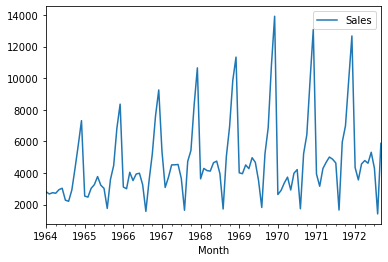

In [20]:
# seasonal data:
df.plot()

In [21]:
# perhaps during christmas, sales go up, 
# otherwise down

# adfuller test, p-value < 0.05

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
# similar to hypothesis test
# Ho(NULL) - data is not stationary
# H1(alt) - data is stationary

adfuller(df['Sales'])

(-1.833593056327623,
 0.363915771660245,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [24]:
def adfuller_test(sales):
    result = adfuller(sales)
    
    labels = ['ADF test statistics', 
              'p-value', 
              'Lags used', 
              'Number of observations used']
    
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
        
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis, reject null hypothesis & data is stationary')
    else:
        print('Weak edidence against null hypothesis, accept the null hypothesis & data is not stationary')

In [26]:
adfuller_test(df['Sales'])

ADF test statistics: -1.833593056327623
p-value: 0.363915771660245
Lags used: 11
Number of observations used: 93
Weak edidence against null hypothesis, accept the null hypothesis & data is not stationary


In [ ]:
# end goal: data must be stationary